In [3]:
using DrWatson
@quickactivate "Doran_etal_2022"

using CSV, DataFrames
using StatsPlots
using Statistics
using SPI
using NewickTreeTools

In [4]:
maxdepthdf = CSV.read(datadir("exp_pro", "UP7047", "2022-06-13_treedepths.csv"), DataFrame)

,treename,maxdepth
,String31,Int64
1,SPI,1603
2,UP7047-ogg-cityblock,200
3,UP7047-ogg-euclidean,275
4,UP7047-seq-fastANI,467
5,UP7047-svd-cityblock,68
6,UP7047-svd-euclidean,73


In [5]:
pdir = plotsdir("UP7047_MI-tree-curves")
mkpath(pdir)

"/Users/ben/projects/Doran_etal_2022/plots/UP7047_MI-tree-curves"

## SPI Tree

In [6]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-05-23_MI-spitree_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];

# spi_tree = readnw(read(joinpath(projectdir(), "_research", "runSPIonUP7047rows", "2022-02-22_UP7047-supporttree.nw"), String));
# as_polytomy!(spi_tree, fun=n->NewickTree.support(n)<0.5)
# as_polytomy!(spi_tree, fun=n->NewickTree.distance(n)<1e-8)
# minmax = extrema(mapinternalnodes(network_distance, spi_tree, spi_tree))
cuts = range(0, maxdepthdf.maxdepth[maxdepthdf.treename .== "SPI"][1], length=100)

0.0:16.19191919191919:1603.0

In [17]:
# legend
plot([0 0 0 0 0], 
    labels=string.([:Uniform :Phylum :Order :Genus :Species]), 
    c=[:grey :red :orange :green :aqua],
    linestyle=[:dash :solid :solid :solid :solid],
    legend=:outertop,
    legendfontsize=20,
    size=(400,400), 
    framestyle=:none)
savefig(joinpath(pdir, "mainMIlegend.pdf"))

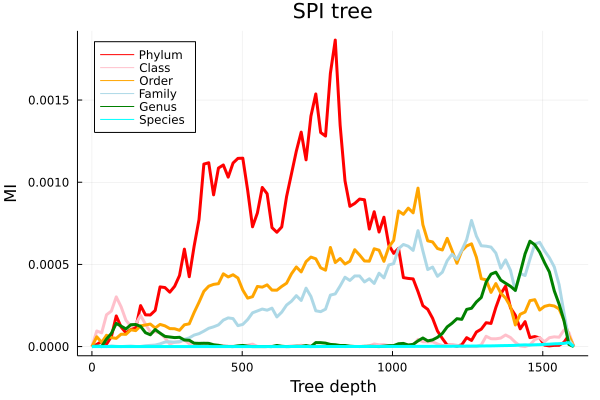

In [21]:
plot(title="SPI tree",ylabel="MI", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     # df = filter(:taxaID=> ==(tlab), plotdf)
#     # perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
#     # perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
#     # plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

In [7]:
savefig(joinpath(pdir, "SPItree_rawMI.pdf"))

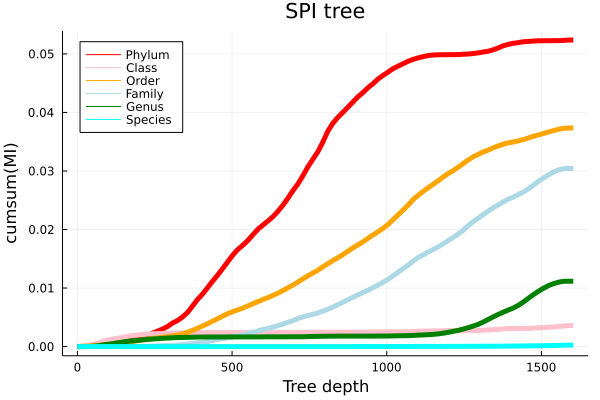

In [8]:

plot(title="SPI tree", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=5)
end
plot!()

In [9]:
savefig(joinpath(pdir, "SPItree_cumMI.pdf"))

In [25]:
plotdf[!, :id] .= repeat(1:100, 6);

,Phylum1,Class1,Order1,Family1,Genus1,Species1,Phylum2
,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.61133e-8,2.89584e-9,1.52259e-7,6.48932e-8,1.16088e-8,4.85598e-8,4.49564e-9
3,2.04686e-8,3.44513e-8,1.78257e-8,1.16791e-7,6.45912e-11,8.9945e-8,1.40412e-8
4,3.49619e-8,5.13325e-9,5.07919e-9,3.02066e-10,5.40462e-9,1.78734e-9,3.44842e-8
5,4.11958e-8,5.07256e-9,5.14345e-9,1.5361e-7,4.10059e-8,5.25561e-10,7.01482e-9
6,9.78431e-8,1.33914e-11,1.37214e-10,6.16526e-9,5.56896e-8,3.95439e-8,1.01428e-9
7,4.30804e-9,1.81164e-8,1.31631e-8,3.23736e-8,2.66677e-9,3.82985e-9,7.22972e-8
8,3.77622e-9,4.10119e-9,2.98791e-8,1.02178e-9,2.13341e-8,5.80388e-9,1.5426e-9
9,1.08185e-8,1.90153e-8,1.49745e-8,3.84979e-9,6.29614e-8,4.00571e-8,3.38884e-12


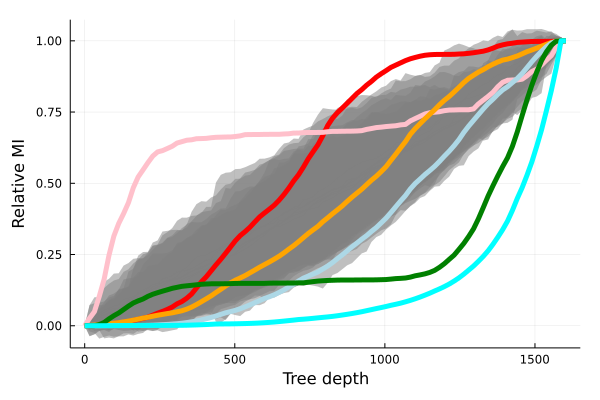

In [35]:

plot(
    # title="SPI tree", 
    margin=3Plots.Measures.mm, 
    ylabel="Relative MI", 
    xlabel="Tree depth", 
    legend=:none,
)
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    perm_μ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->mean(m, dims=2)[:]
    perm_σ = Matrix(df[!,3:end]) |>
        m->scaledcumsum(m, dims=1) |>
        m->std(m, dims=2)[:]
    plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
end
# permdf=DataFrame()
# for i in 1:5
#     permdf = hcat(permdf, unstack(plotdf, :id, :taxaID, "MI_perm$i"; renamecols=c->c * string(i))[:, 2:end])
# end
# perm_μ = Matrix(permdf) |>
#     m->scaledcumsum(m, dims=1) |>
#     m->mean(m, dims=2)[:]
# perm_σ = Matrix(permdf) |>
#     m->scaledcumsum(m, dims=1) |>
#     m->std(m, dims=2)[:]
# plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)

# plot!([0, last(cuts)], [0,1], c=:grey, linestyle=:dash, alpha=.5, lw=2, label="Uniform")
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=5)
end
plot!()

In [34]:
savefig(joinpath(pdir, "SPItree_relMI_withperm.pdf"))

## OGG euclidean Tree

In [12]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-05-23_MI-UP7047-ogg-euclidean_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];
cuts = range(0, maxdepthdf.maxdepth[maxdepthdf.treename .== "UP7047-ogg-euclidean"][1], length=100)

0.0:2.7777777777777777:275.0

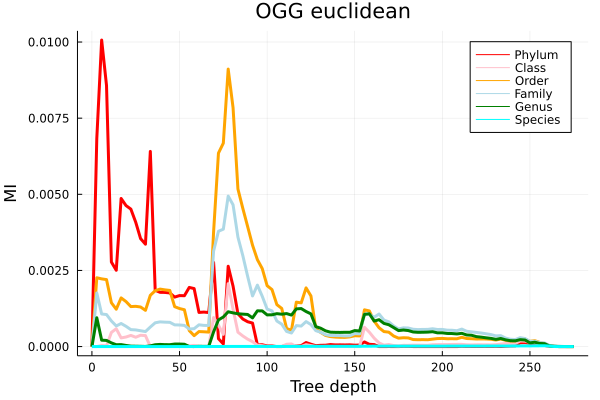

In [13]:

plot(title="OGG euclidean", ylabel="MI", xlabel="Tree depth", legend=:topright)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
#     perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

In [14]:
savefig(joinpath(pdir, "OGGEuclideantree_rawMI.pdf"))

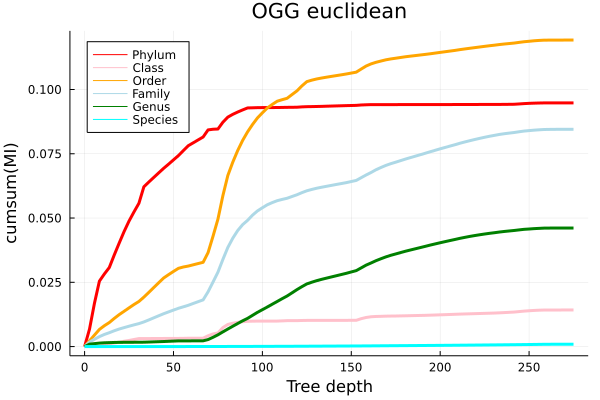

In [15]:

plot(title="OGG euclidean", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

In [16]:
savefig(joinpath(pdir, "OGGEuclideantree_cumMI.pdf"))

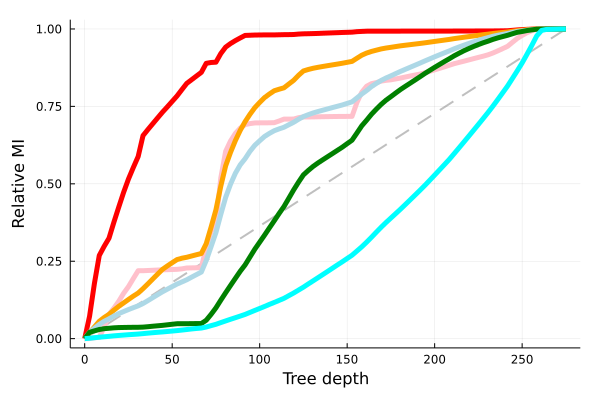

In [17]:

plot(
    # title="OGG Euclidean", 
    margin=3Plots.Measures.mm, 
    ylabel="Relative MI", 
    xlabel="Tree depth", 
    legend=:none
    )
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
plot!([0, last(cuts)], [0,1], c=:grey, linestyle=:dash, alpha=.5, lw=2, label="Uniform")
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=5)
end
plot!()

In [18]:
savefig(joinpath(pdir, "OGGEuclideantree_relMI.pdf"))

## OGG Cityblock Tree

In [19]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-06-13_MI-UP7047-ogg-cityblock_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];
cuts = range(0, maxdepthdf.maxdepth[maxdepthdf.treename .== "UP7047-ogg-cityblock"][1], length=100)

0.0:2.0202020202020203:200.0

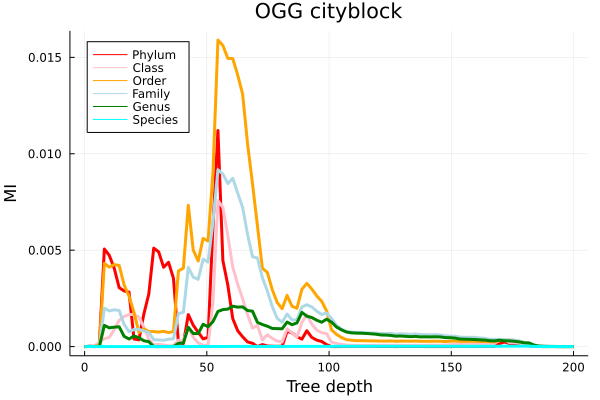

In [20]:

plot(title="OGG cityblock", ylabel="MI", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
#     perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

In [21]:
savefig(joinpath(pdir, "OGGCityblocktree_rawMI.pdf"))

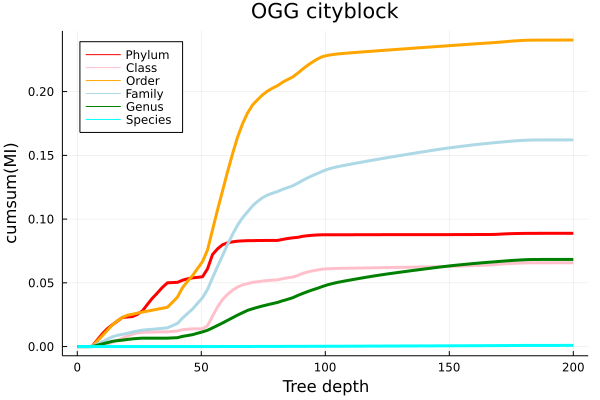

In [22]:

plot(title="OGG cityblock", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

In [23]:
savefig(joinpath(pdir, "OGGCityblocktree_cumMI.pdf"))

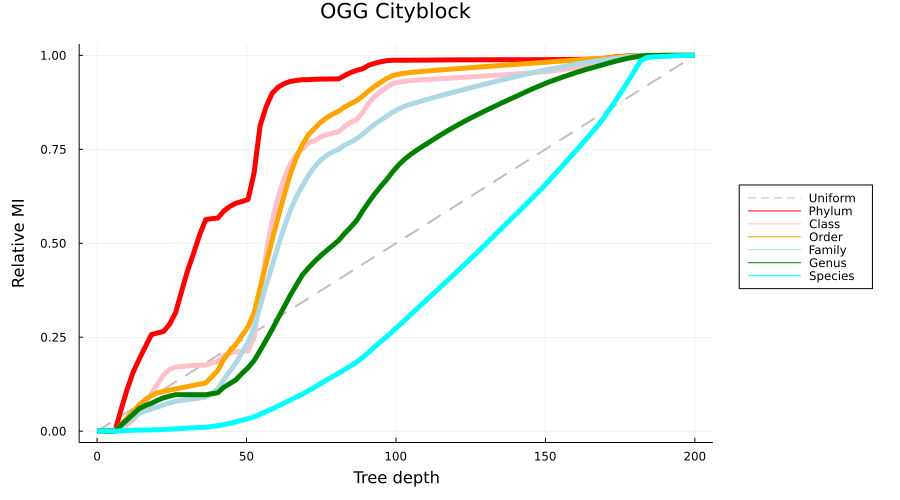

In [24]:

plot(title="OGG Cityblock", size=(900, 500), margin=5Plots.Measures.mm, ylabel="Relative MI", xlabel="Tree depth", legend=:outerright)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
plot!([0, last(cuts)], [0,1], c=:grey, linestyle=:dash, alpha=.5, lw=2, label="Uniform")
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=5)
end
plot!()

In [25]:
savefig(joinpath(pdir, "OGGCityblocktree_relMI.pdf"))

## Top 10 PCs Euclidean Tree

In [26]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-05-23_MI-UP7047-svd-euclidean_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];
cuts = range(0, maxdepthdf.maxdepth[maxdepthdf.treename .== "UP7047-svd-euclidean"][1], length=100)

0.0:0.7373737373737373:73.0

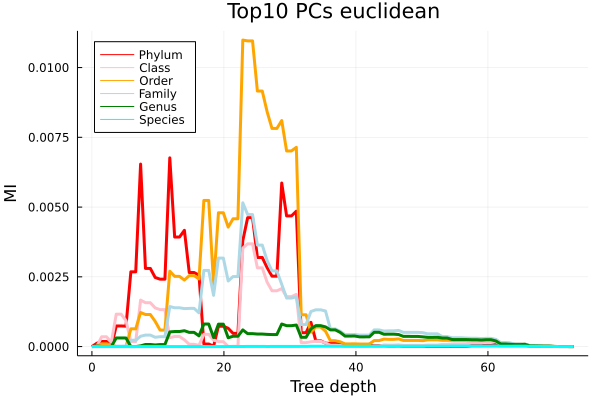

In [27]:

plot(title="Top10 PCs euclidean", ylabel="MI", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
#     perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

In [28]:
savefig(joinpath(pdir, "Top10PCs_Euclideantree_rawMI.pdf"))

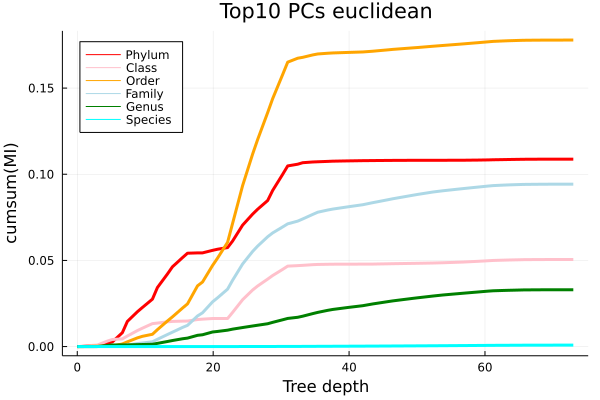

In [29]:

plot(title="Top10 PCs euclidean", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

In [30]:
savefig(joinpath(pdir, "Top10PCs_Euclideantree_cumMI.pdf"))

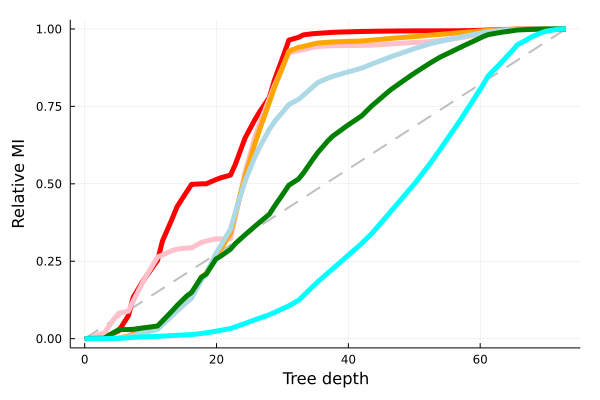

In [31]:

plot(
    # title="Top10 PCs Euclidean", 
    margin=3Plots.Measures.mm, 
    ylabel="Relative MI", 
    xlabel="Tree depth", 
    legend=:none
    )
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
plot!([0, last(cuts)], [0,1], c=:grey, linestyle=:dash, alpha=.5, lw=2, label="Uniform")
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=5)
end
plot!()

In [32]:
savefig(joinpath(pdir, "Top10PCs_Euclideantree_relMI.pdf"))

## Top 10 PCs Cityblock Tree

In [33]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-06-13_MI-UP7047-svd-cityblock_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];
cuts = range(0, maxdepthdf.maxdepth[maxdepthdf.treename .== "UP7047-svd-cityblock"][1], length=100)

0.0:0.6868686868686869:68.0

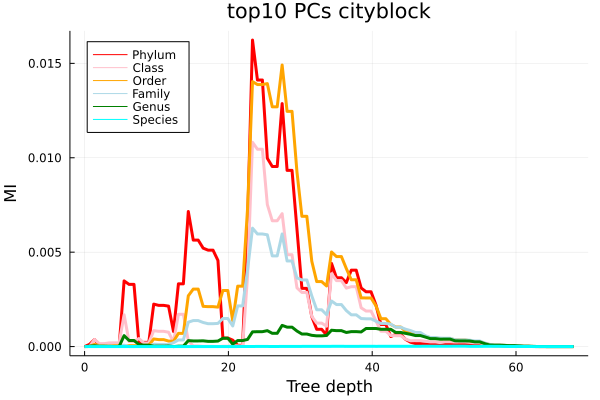

In [34]:

plot(title="top10 PCs cityblock", ylabel="MI", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
#     perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

In [35]:
savefig(joinpath(pdir, "Top10PCs_Cityblocktree_rawMI.pdf"))

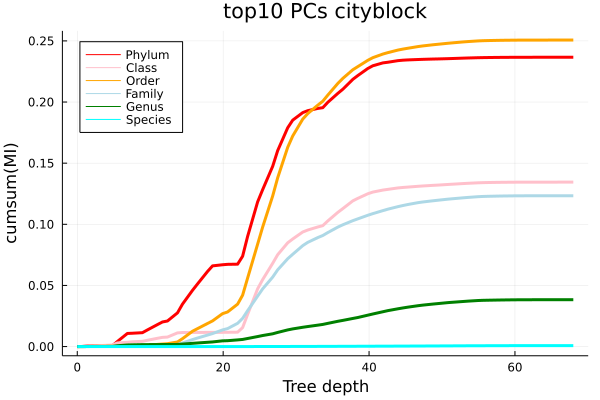

In [36]:

plot(title="top10 PCs cityblock", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

In [37]:
savefig(joinpath(pdir, "Top10PCs_Cityblocktree_cumMI.pdf"))

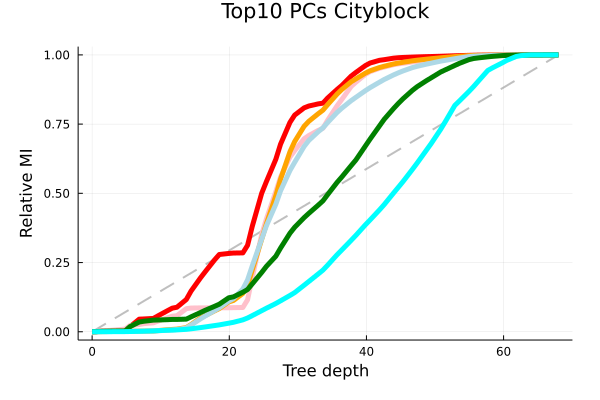

In [38]:

plot(
    title="Top10 PCs Cityblock", 
    # size=(900, 500),
     margin=5Plots.Measures.mm, 
     ylabel="Relative MI", 
     xlabel="Tree depth", 
     legend=:none)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
plot!([0, last(cuts)], [0,1], c=:grey, linestyle=:dash, alpha=.5, lw=2, label="Uniform")
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=5)
end
plot!()

In [39]:
savefig(joinpath(pdir, "Top10PCs_Cityblocktree_relMI.pdf"))

## FastANI Tree

In [40]:
## Plot MI curves
plotdf = CSV.read(joinpath(datadir(), "exp_pro", "UP7047", "2022-06-13_MI-UP7047-seq-fastANI_treedepth-by-taxa.csv"), DataFrame);
taxaranklabels = string.([:Phylum :Class :Order :Family :Genus :Species])
taxarankcolors = [:red :pink :orange :lightblue :green :aqua];
cuts = range(0, maxdepthdf.maxdepth[maxdepthdf.treename .== "UP7047-seq-fastANI"][1], length=100)

0.0:4.717171717171717:467.0

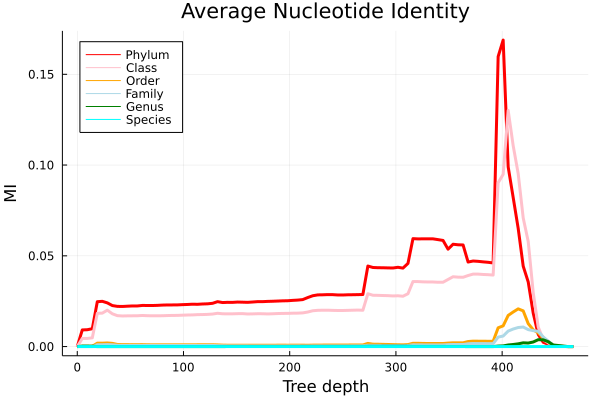

In [41]:

plot(title="Average Nucleotide Identity", ylabel="MI", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = mean(Matrix(df[!,3:end]), dims=2)[:]
#     perm_σ = std(Matrix(df[!,3:end]), dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, :MI, label=tlab, c=tcol, lw=3)
end
plot!()

In [42]:
savefig(joinpath(pdir, "Seqsim_fastANI_rawMI.pdf"))

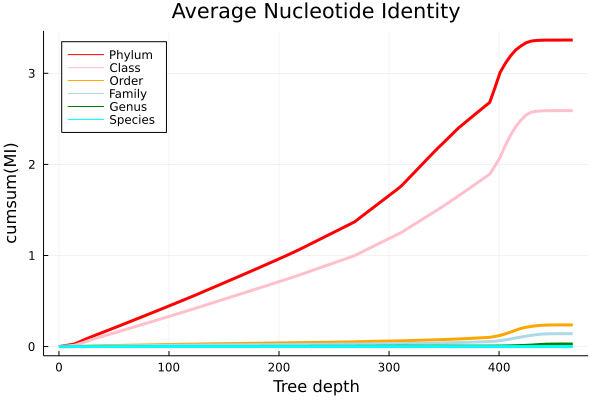

In [43]:

plot(title="Average Nucleotide Identity", ylabel="cumsum(MI)", xlabel="Tree depth", legend=:topleft)
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->cumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, cumsum(:MI), label=tlab, c=tcol, lw=3)
end
plot!()

In [44]:
savefig(joinpath(pdir, "Seqsim_fastANI_cumMI.pdf"))

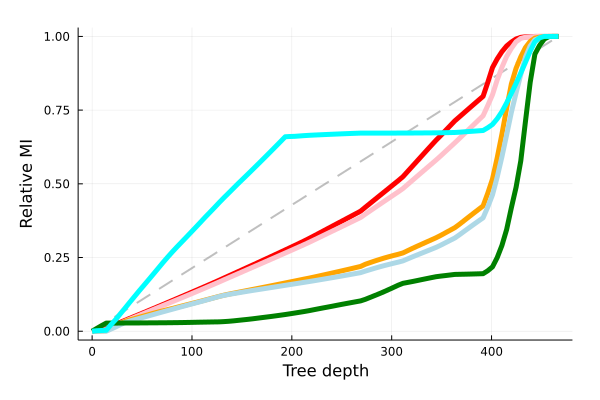

In [45]:

plot(
    # title="Top10 PCs Cityblock", 
    # size=(900, 500), 
    margin=5Plots.Measures.mm, 
    ylabel="Relative MI", 
    xlabel="Tree depth", 
    legend=:none
    )
# for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
#     df = filter(:taxaID=> ==(tlab), plotdf)
#     perm_μ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->mean(m, dims=2)[:]
#     perm_σ = Matrix(df[!,3:end]) |>
#         m->scaledcumsum(m, dims=1) |>
#         m->std(m, dims=2)[:]
#     plot!(cuts, perm_μ, ribbon=1.96perm_σ, label="", c=:grey)
# end
plot!([0, last(cuts)], [0,1], c=:grey, linestyle=:dash, alpha=.5, lw=2, label="Uniform")
for (tlab, tcol) in zip(taxaranklabels, taxarankcolors)
    df = filter(:taxaID=> ==(tlab), plotdf)
    @df df plot!(cuts, scaledcumsum(:MI), label=tlab, c=tcol, lw=5)
end
plot!()

In [46]:
savefig(joinpath(pdir, "Seqsim_fastANI_relMI.pdf"))

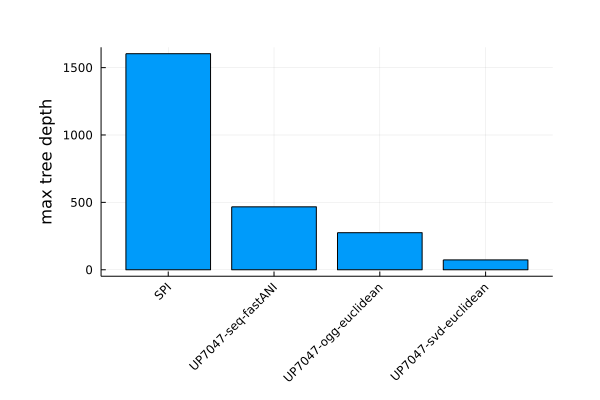

In [47]:
@df maxdepthdf[[1,4,3,6], :] bar(:treename, :maxdepth, ylabel="max tree depth", label="", xrotation=45, margin=Plots.Measures.cm)

In [48]:
savefig(joinpath(pdir, "MaxDepth_by_tree_nocityblock.pdf"))

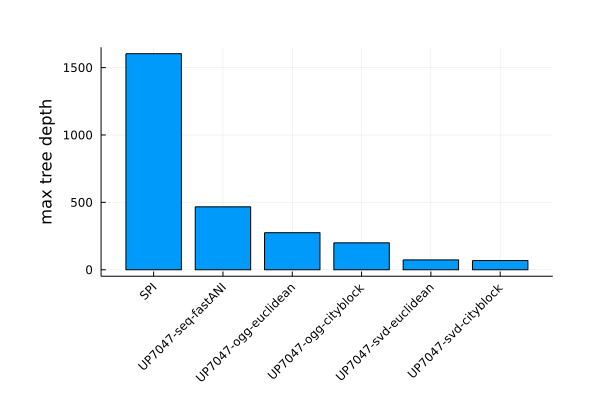

In [49]:
@df sort(maxdepthdf, :maxdepth, rev=true) bar(:treename, :maxdepth, ylabel="max tree depth", label="", xrotation=45, margin=Plots.Measures.cm)

In [50]:
savefig(joinpath(pdir, "MaxDepth_by_tree.pdf"))